In [4]:
# LIBRARIES: 

import os
import re
import numpy as np
import pandas as pd
import dotenv
import matplotlib.pyplot as plt

In [18]:
# CONFIGURATIONS: 


dotenv.load_dotenv()
santi_project_path = os.getenv("santi_project_path")
print("santi_project_path:", santi_project_path)

dataset_images_path = "/1_DataSet/1_DataSet/"
dataset_images_path_data = "/2_EDA_Data_Processing/imagenes.npy"
metadata_path = "/2_EDA_Data_Processing/df_dataset_metadatos.csv"


imagenes_path = f"{santi_project_path}/{dataset_images_path_data}"
metadata_path = f"{santi_project_path}/{metadata_path}"


santi_project_path: /Users/santireycha/Documents/ML_PROJECTS/AUTONOMOUIS_CAR


In [24]:
# DOCUMENTATION:
## READING DATA


array_imagenes = np.load(imagenes_path, allow_pickle=True)
print("array_imagenes shape:", array_imagenes.shape)    

df_dataset_metadatos = pd.read_csv(metadata_path)
print("df_dataset_metadatos shape:", df_dataset_metadatos.shape)

array_imagenes shape: (31711, 66, 200, 3)
df_dataset_metadatos shape: (31711, 4)


In [40]:
# NOTE:                                                                                                       
# DATA PREPARATION:

# Ready to Consume.
array_imagenes 


# To extract radians from df, need to take the column radianes
radiantes_reg = []

for index, row in df_dataset_metadatos.iterrows():
    radianes = row['radianes']
    # hacer float, redondeando a 4 decimales
    radianes = float(radianes)
    radianes = round(radianes, 4)
    radiantes_reg.append(radianes)


In [41]:
# VALIDATION:
print("Number of images:", len(array_imagenes))
print("Number of radiantes:", len(radiantes_reg))


print("First 5 radiantes:", radiantes_reg[:5])
df_dataset_metadatos.head()


Number of images: 31711
Number of radiantes: 31711
First 5 radiantes: [0.004, -0.006, -0.004, 0.05, 0.014]


,indice,path_image,direccion,radianes
0,0,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,right,0.004
1,1,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,left,-0.006
2,2,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,left,-0.004
3,3,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,right,0.050
4,4,/Users/santireycha/Documents/ML_PROJECTS/AUTON...,right,0.014


# DEEP LEARNING:

In [48]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers


In [46]:
# DATA PROCESSING: 
array_imagenes_norm = array_imagenes/255
labels = np.array(radiantes_reg)




X_train, X_test, y_train, y_test = train_test_split(array_imagenes_norm, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25368, 66, 200, 3) (6343, 66, 200, 3) (25368,) (6343,)


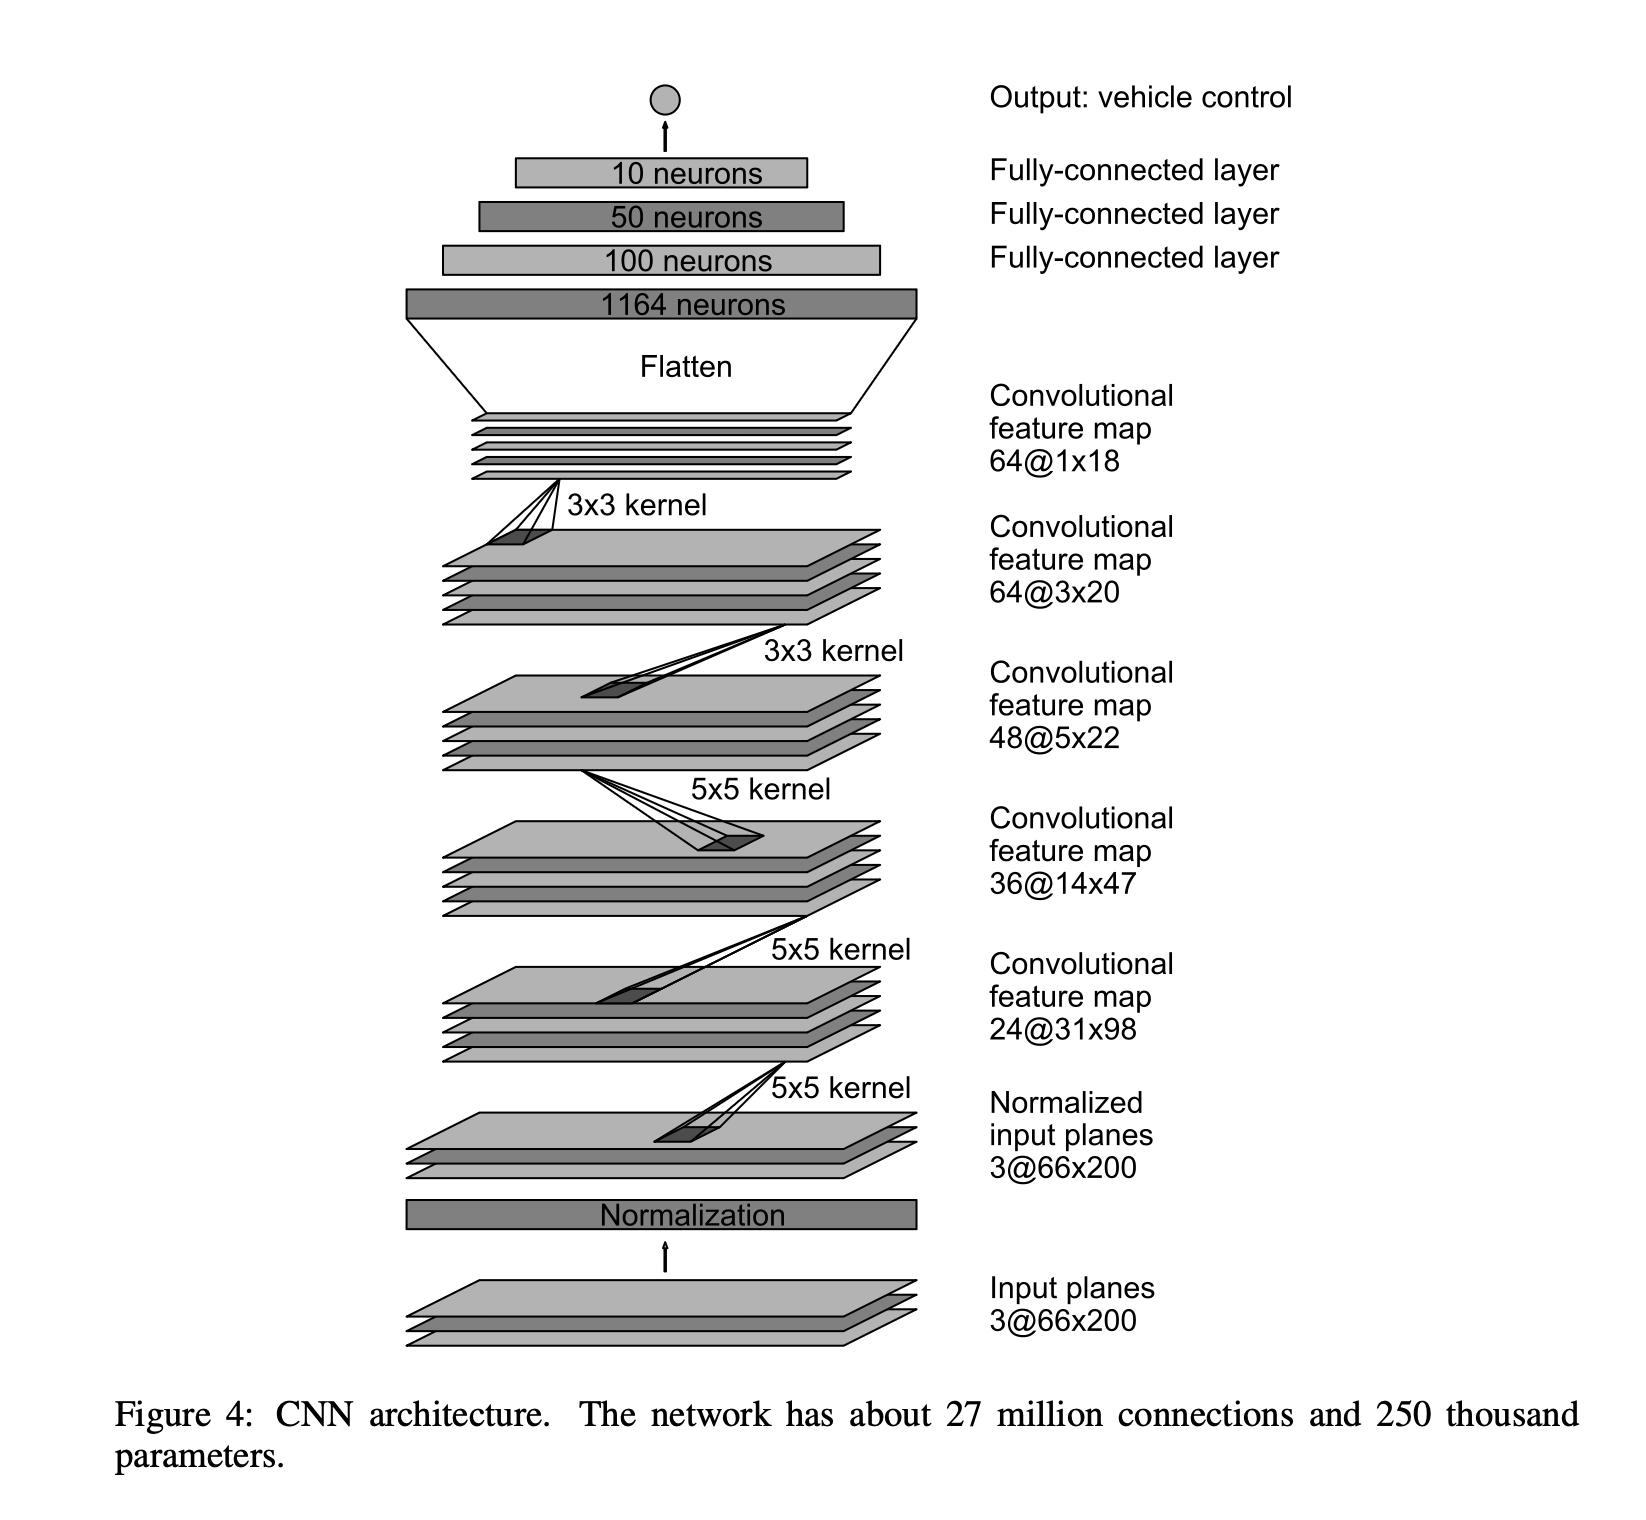

In [49]:
# DOCUMENTATION:

# subNOTE:          1:
# Capa de entrada y Normalización
# El paper indica que la entrada son 3 planos de 66x200 (YUV).
# La primera capa normaliza los datos. Usamos Rescaling para escalar los
# valores de los píxeles (ej. de [0, 255] a [0, 1]).

# subNOTE:          2:
# Inicio de las capas convolucionales
# El paper describe 5 capas convolucionales. Las primeras 3 usan un
# stride de 2x2 y un kernel de 5x5.

# subNOTE:          3:
# Las últimas 2 capas convolucionales no tienen stride y usan un kernel de 3x3.
# # Aplanado (Flatten) para conectar con las capas densas

# subNOTE:          4:
# Capas totalmente conectadas (Dense)
# El paper describe 3 capas totalmente conectadas antes de la salida.

# subNOTE:          5:
# Capa de salida
# Es una sola neurona sin función de activación (lineal), ya que es un
# problema de regresión para predecir el ángulo de giro.

In [51]:
model = keras.Sequential([
    # subNOTE:          1:
    layers.Input(shape=(66,200,3)), # Esta es mi entrada de imagenes, ya estan normalizadas

    # subNOTE:          2:
    layers.Conv2D(24, kernel_size=(5, 5), strides=(2, 2), activation='relu'),
    layers.Conv2D(36, kernel_size=(5, 5), strides=(2, 2), activation='relu'),
    layers.Conv2D(48, kernel_size=(5, 5), strides=(2, 2), activation='relu'),

    # subNOTE:          3:    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),

    # subNOTE:          4:
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='relu'),

    # subNOTE:          5:
    layers.Dense(1)
])


In [52]:
model.compile(
        loss='mean_squared_error',
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        metrics=['mae']  
    )

In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 31, 98, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 47, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 5, 22, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 20, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 1, 18, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       115,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,219 (985.23 KB)

 Trainable params: 252,219 (985.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenando

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)

# Evaluación del modelo
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss}, Test MAE: {mae}")
# Gráfica de la pérdida y MAE durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
